In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set()

In [2]:
# Import Data

data = pd.read_csv('diabetes.csv')

In [3]:
# Looking at first few rows of the dataset

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# general Information of the Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.shape

(768, 9)

i.e their are 768 instances present in the dataset with 9 features

In [6]:
# General Mathematical Calculation of various features

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 12.453125, 'Features')

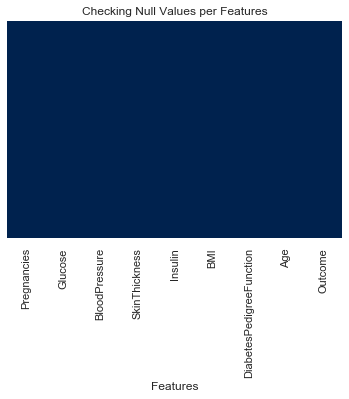

In [7]:
# Checking any null values

sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap='cividis')
plt.title('Checking Null Values per Features')
plt.xlabel('Features')

Text(0.5, 1.0, 'Result')

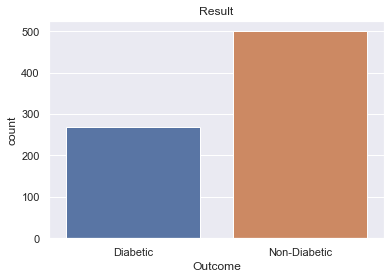

In [8]:
# Counting people with positive and negative diabetes 

sns.countplot(data['Outcome'].map({0:'Non-Diabetic',1:'Diabetic'}))
plt.title('Result')

(0, 15)

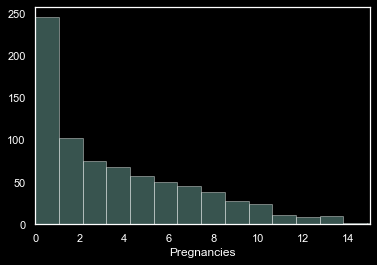

In [9]:
# looking at Pregnency Distribution
sns.set(style='white')
plt.style.use('dark_background')
sns.distplot(data['Pregnancies'],kde=False)
plt.xlim(0,15)

In [10]:
# Checking Outliers
len(data[data['Pregnancies']>10].sort_values('Outcome'))

34

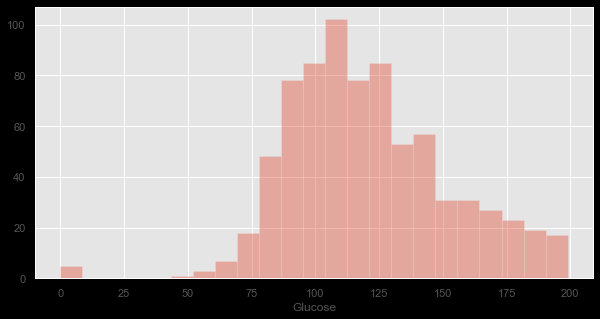

In [11]:
# Gluscose distribution 
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
sns.distplot(data['Glucose'],kde=False)

In [12]:
# People who should not
data.drop(data[data['Glucose']<=20].index,inplace=True)

Note that glucose level less than about 20 is impossible or the person is already be dead.So,we will consider them as fake and therefore drop these instances

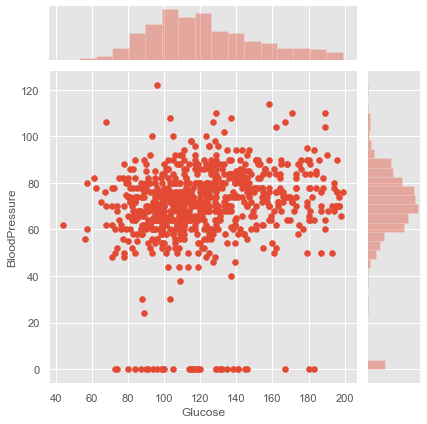

In [13]:
sns.jointplot(data['Glucose'],data['BloodPressure'])

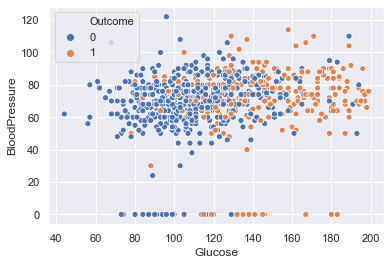

In [14]:
sns.set()
sns.scatterplot(data['Glucose'],data['BloodPressure'],hue=data['Outcome'])

From Above we can notice that glucose is better parameter than blood pressure ,as it can majorly split at line 120

In [15]:
# Mean Blood Pressure range for the peoples that are diabetic and non-diabetic

print('Non-Diabetic : ',data[data['Outcome']==0]['BloodPressure'].median())
print('Diabetic : ',data[data['Outcome']==1]['BloodPressure'].median())


Non-Diabetic :  70.0
Diabetic :  74.0


In [16]:
len(data[(data['Glucose']<120) & (data['Outcome']==1)])

68

In [17]:
data[data['BloodPressure']>120]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
106,1,96,122,0,0,22.4,0.207,27,0


In [18]:
# Appying ML Mo

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [19]:
X = data.iloc[:,:8].values

In [20]:
y = data.iloc[:,-1].values

In [21]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

In [22]:
X_scaled[:5]

array([[0.35294118, 0.67096774, 0.59016393, 0.35353535, 0.        ,
        0.50074516, 0.23441503, 0.48333333],
       [0.05882353, 0.26451613, 0.54098361, 0.29292929, 0.        ,
        0.39642325, 0.11656704, 0.16666667],
       [0.47058824, 0.89677419, 0.52459016, 0.        , 0.        ,
        0.34724292, 0.25362938, 0.18333333],
       [0.05882353, 0.29032258, 0.54098361, 0.23232323, 0.11111111,
        0.41877794, 0.03800171, 0.        ],
       [0.        , 0.6       , 0.32786885, 0.35353535, 0.19858156,
        0.64232489, 0.94363792, 0.2       ]])

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=101,stratify=y)

In [24]:
X_train[:5]

array([[0.29411765, 0.46451613, 0.60655738, 0.29292929, 0.        ,
        0.48137109, 0.24850555, 0.23333333],
       [0.17647059, 0.52258065, 0.47540984, 0.        , 0.        ,
        0.4709389 , 0.03116994, 0.05      ],
       [0.70588235, 0.69032258, 0.57377049, 0.4040404 , 0.32033097,
        0.62295082, 0.28351836, 0.28333333],
       [0.70588235, 0.61935484, 0.67213115, 0.43434343, 0.38416076,
        0.58420268, 0.19214347, 0.61666667],
       [0.23529412, 0.98709677, 0.57377049, 0.39393939, 0.87943262,
        0.54694486, 0.96114432, 0.16666667]])

In [25]:
X_test[:5]

array([[0.52941176, 0.4       , 0.42622951, 0.        , 0.        ,
        0.46497765, 0.12894962, 0.35      ],
       [0.05882353, 0.30967742, 0.50819672, 0.25252525, 0.04846336,
        0.29061103, 0.17250213, 0.06666667],
       [0.29411765, 0.76129032, 0.85245902, 0.        , 0.        ,
        0.56184799, 0.03116994, 0.51666667],
       [0.        , 0.50967742, 0.72131148, 0.37373737, 0.        ,
        0.52459016, 0.05081127, 0.13333333],
       [0.05882353, 0.76774194, 0.59016393, 0.        , 0.        ,
        0.58122206, 0.48847139, 0.2       ]])

In [26]:
X_train.shape

(572, 8)

In [27]:
X_test.shape

(191, 8)

In [28]:
y_train.shape

(572,)

In [29]:
y_test.shape

(191,)

In [30]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [31]:
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = log_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score,classification_report,recall_score,confusion_matrix

In [34]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.90      0.82       124
           1       0.72      0.46      0.56        67

    accuracy                           0.75       191
   macro avg       0.74      0.68      0.69       191
weighted avg       0.74      0.75      0.73       191




Accuracy :  0.7486910994764397



Recall Value :  0.4626865671641791



[[112  12]
 [ 36  31]]


In [35]:
from sklearn.svm import SVC
svc_model = SVC()

In [36]:
from sklearn.model_selection import cross_val_score,GridSearchCV
pref = {
    'C':[0.01,0.1,1,5,10],
    'kernel':['rbf','poly','linear'],
    'degree':[1,2,3,4,5]
}

In [37]:
grid_s = GridSearchCV(svc_model,param_grid=pref,cv=10,scoring='accuracy',n_jobs=-1)

In [38]:
grid_s.fit(X_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 5, 10], 'degree': [1, 2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [39]:
grid_s.best_estimator_

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [40]:
grid_s.best_score_

0.7814685314685315

In [41]:
svc_model = grid_s.best_estimator_

In [42]:
svc_model.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [43]:
y_pred = svc_model.predict(X_test)

In [44]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.86      0.80       124
           1       0.64      0.45      0.53        67

    accuracy                           0.72       191
   macro avg       0.69      0.66      0.66       191
weighted avg       0.71      0.72      0.70       191




Accuracy :  0.7172774869109948



Recall Value :  0.44776119402985076



[[107  17]
 [ 37  30]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt_model = DecisionTreeClassifier()

In [47]:
pref = {
    'criterion':['gini','entropy'],
    'max_depth':[5,12,15,20,22],
    'min_samples_split':[0.05,0.1,0.12,0.15,0.2],
    'min_samples_leaf':[0.01,0.05,0.1,0.12,0.15,0.2]
}
dt_grid = GridSearchCV(dt_model,param_grid=pref,scoring='accuracy',cv=10,n_jobs=-1) 

In [48]:
dt_grid.fit(X_train,y_train)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 12, 15, 20, 22],
                   

In [49]:
dt_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=0.15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
dt_grid.best_score_

0.7814685314685315

In [51]:
dt_model = dt_grid.best_estimator_

In [52]:
cross_val_score(dt_model,X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1).mean()

0.7818997925849106

In [53]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.01, min_samples_split=0.15,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [54]:
y_pred = dt_model.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.83      0.79       124
           1       0.62      0.51      0.56        67

    accuracy                           0.72       191
   macro avg       0.69      0.67      0.67       191
weighted avg       0.71      0.72      0.71       191




Accuracy :  0.7172774869109948



Recall Value :  0.5074626865671642



[[103  21]
 [ 33  34]]


In [56]:
from sklearn.naive_bayes import GaussianNB
naive_model = GaussianNB()

In [57]:
cross_val_score(naive_model,X_train,y_train,cv=10,scoring='accuracy').mean()

0.7749124967591393

In [58]:
naive_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
y_pred = naive_model.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.79      0.77       124
           1       0.57      0.52      0.55        67

    accuracy                           0.70       191
   macro avg       0.66      0.66      0.66       191
weighted avg       0.69      0.70      0.69       191




Accuracy :  0.6963350785340314



Recall Value :  0.5223880597014925



[[98 26]
 [32 35]]


In [64]:
pd.DataFrame(data=dt_model.feature_importances_,index=data.columns[:8])

,0
Pregnancies,0.000000
Glucose,0.543669
BloodPressure,0.040550
SkinThickness,0.056817
Insulin,0.000000
BMI,0.207166
DiabetesPedigreeFunction,0.029537
Age,0.122260


In [69]:
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()

In [71]:
cross_val_score(random_model,X_train,y_train,cv=10,scoring='accuracy').mean()

0.7553096102324777

In [72]:
random_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
y_pred = random_model.predict(X_test)

In [76]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      0.85      0.80       124
           1       0.64      0.48      0.55        67

    accuracy                           0.72       191
   macro avg       0.70      0.67      0.67       191
weighted avg       0.71      0.72      0.71       191




Accuracy :  0.7225130890052356



Recall Value :  0.47761194029850745



[[106  18]
 [ 35  32]]


In [77]:
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier()

In [79]:
cross_val_score(Ada_model,X_train,y_train,cv=10,scoring='accuracy').mean()

0.7803322962578861

In [80]:
Ada_model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [81]:
y_pred = Ada_model.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.83      0.80       124
           1       0.62      0.52      0.57        67

    accuracy                           0.72       191
   macro avg       0.69      0.68      0.68       191
weighted avg       0.71      0.72      0.72       191




Accuracy :  0.7225130890052356



Recall Value :  0.5223880597014925



[[103  21]
 [ 32  35]]


In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
Gradien_model = GradientBoostingClassifier()

In [85]:
cross_val_score(Gradien_model,X_train,y_train,cv=10,scoring='accuracy').mean()

0.7801464869069225

In [86]:
Gradien_model.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [87]:
y_pred = Gradien_model.predict(X_test)

In [88]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       124
           1       0.61      0.52      0.56        67

    accuracy                           0.72       191
   macro avg       0.69      0.67      0.68       191
weighted avg       0.71      0.72      0.71       191




Accuracy :  0.7172774869109948



Recall Value :  0.5223880597014925



[[102  22]
 [ 32  35]]


In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [96]:
cross_val_score(knn_model,X_train,y_train,cv=10,scoring='accuracy').mean()

0.7292973813844957

In [97]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [98]:
y_pred = knn_model.predict(X_test)

In [99]:
print(classification_report(y_test,y_pred))
print('\n\n')
print('Accuracy : ',accuracy_score(y_test,y_pred))
print('\n\n')
print('Recall Value : ',recall_score(y_test,y_pred))
print('\n\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       124
           1       0.69      0.55      0.61        67

    accuracy                           0.75       191
   macro avg       0.73      0.71      0.72       191
weighted avg       0.75      0.75      0.75       191




Accuracy :  0.7539267015706806



Recall Value :  0.5522388059701493



[[107  17]
 [ 30  37]]


In [100]:
accuracy_score(y_train,knn_model.predict(X_train))

0.8741258741258742